**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 08:** Aprendizado por Reforço

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula08_aprendizado_por_reforco.ipynb)

# Contextualização

Para entendermos o nosso conteúdo, devemos ter em mente:

1. O aprendizado de máquina é um subconjunto de inteligência artificial que fornece às máquinas a capacidade de aprender automaticamente e melhorar a experiência sem serem explicitamente programadas.
2. O aprendizado por reforço (Reinforcement Learning) é um tipo de aprendizado de máquina cujo objetivo é tomar medidas adequadas para maximizar a recompensa em uma situação específica.
3. O aprendizado por reforço é usado para encontrar a melhor ação em um determinado cenário, sem termos um exemplo de qual seria a melhor ação registrada em um banco de dados.
4. O aprendizado por reforço tenta estabelecer ou incentivar um padrão de comportamento.

Uma primeira definição para os nossos propósitos seria:

* O aprendizado por reforço é um método de aprendizado em que um agente interage com um ambiente usando ações e descobrindo erros ou recebendo recompensas.

Isso implica dizer que:

* O aprendizado por reforço trata de tomar as medidas apropriadas para maximizar a recompensa em uma situação específica.

# Nomenclatura

Alguns termos se tornaram tão comum na área que precisam ser entendidos antes de começarmos a entender como funciona aprendizado por reforço. Por sorte, o exemplo que demos na aula passada já introduziu grande parte dos conceitos que precisamos definir, faltando apenas inserir uma nomenclatura para cada um deles.

**Agente (agent)**: uma entidade hipotética que executa ações em um ambiente para obter alguma recompensa.

* *No exemplo da aula anterior, a entidade hipotética era o robô que se movimentava pelo jardim.*

**Ação (action)**: os movimentos possíveis que o agente pode executar.

* *No exemplo da aula anterior, as ações eram a movimentação pelo jardim.*

**Ambiente (environment)**: um cenário que o agente precisa enfrentar.

* *No exemplo da aula anterior, o ambiente era o jardim como um todo, um grid $2 \times 2$ dividido em quatro partes e com  o recebimento eventual de recompensas.*

**Estado (state)**: Situação atual dentro do ambiente.

* *No exemplo da aula anterior, os estados correspondiam às divisórias do jardim em quatro partes onde o agente poderia estar: $A$, $B$, $C$ e $D$.*

**Recompensa (reward)**: um retorno imediato enviado do ambiente para premiar ou penalizar a última ação do agente.

* *No exemplo da aula anterior, o agente era recompensado com 5 reais no estado $B$ e nada era dado a ele nos outros estados.*

**Política (policy)**: a estratégia que o agente emprega para determinar a próxima ação com base no estado atual. Usaremos a letra grega $\pi$ para representar uma dada política, sendo que normalmente essa política será representada com uma distribuição de probabilidade sobre todas as ações.

* *No exemplo da aula anterior, a política utilizada pelo agente era a de se mover ao acaso no jardim, não fazendo nada muito sofisticado.*

**Valor do estado (state-value)**: valor esperado do retorno acumulado por ter alcançado um determinado estado. Este valor contabiliza o retorno a longo prazo (com desconto, dada a incerteza pelo retorno ser a longo prazo), em oposição à recompensa de curto prazo. O valor do estado é definido de acordo com uma dada política, dado que a política interfere no retorno a longo prazo.

* *No exemplo da aula anterior, o valor de estado era o valor esperado do ganho acumulado $G$ em todos os estados, sendo que computamos com a abordagem frequentista e com bootstrapping.*

**Valor da ação (action value)**: valor esperado do retorno acumulado a longo prazo de uma ação em um determinado estado. Este valor contabiliza o retorno a longo prazo (com desconto, dada a incerteza pelo retorno ser a longo prazo). Semelhante ao valor de estado, o valor de uma ação depende da política.

* *Não usamos valor de ação no exemplo da aula anterior.* Nesse caso, teremos ainda que formalizar esse conceito.



# Cenário da Aula Passada

A figura a seguir mostra tudo o que precisamos lembrar. Só reforçaremos a questão das recompensas e da política.

**Recompensa**: vamos assumir que
1. a recompensa é 0 ao chegar em todos os estados, exceto quando o agente chegar ao estado B.
2. Se o agente chegar ao estado B, receberá uma recompensa de +5.
* Isso inclui começar no estado B e bater em uma parede para permanecer em B.

**Política**: vamos considerar uma política que segue a distribuição uniforme de probabilidade. Em outras palavras, em qualquer estado, o agente tem 25% de probabilidade para se mover em qualquer direção.



![alt text](http://www.ic.unicamp.br/~udias/si202/grid_world_01.png))

## Caminhamentos no Ambiente

Dado um caminhamento no grid, temos um ganho ao final com os seus respectivos descontos. Se começarmos no estado **A**, podemos encontrar os seguintes caminhamentos:




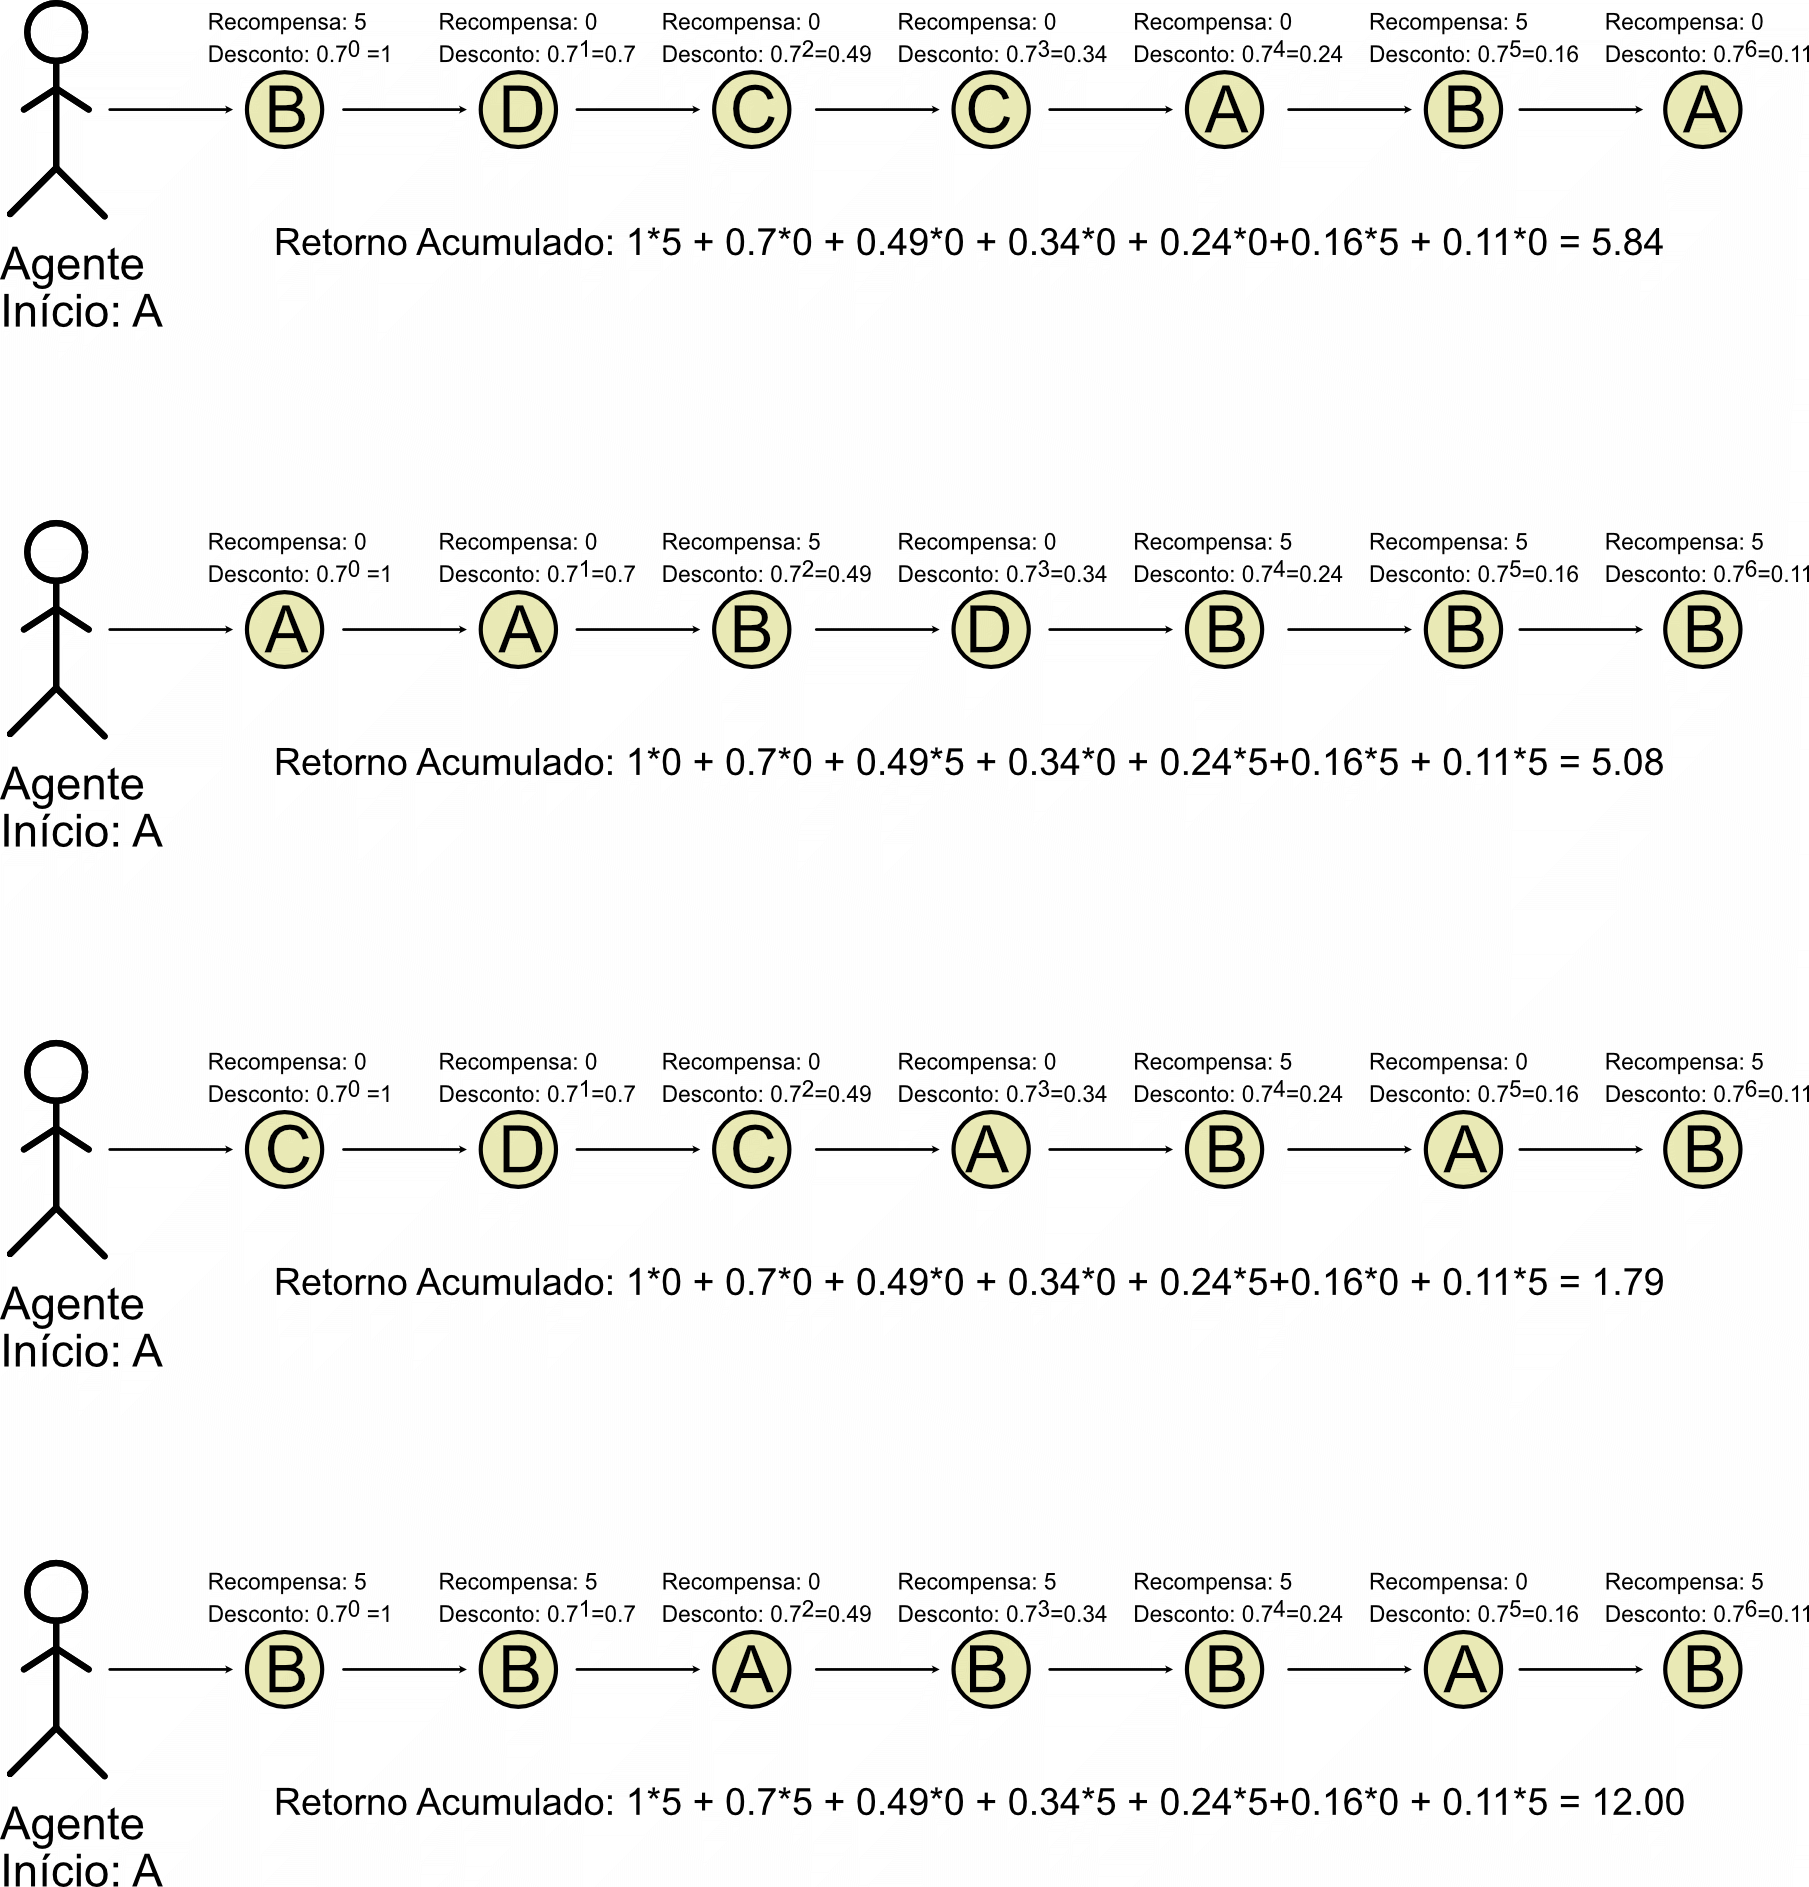

## Action-Values (Valores das Ações)

Em um determinado estado, sabemos que o ganho obtido por cada ação muda. Nesse caso, podemos encontrar as ações preferidas (as que levam a um retorno maior) se mudarmos um pouco um experimento.

Nesse caso, **ao invés de considerar que estamos apenas parados em um estado, vamos considerar que estamos parados no estado com a prévia intenção de nos movermos em um direção específica.**

Nesse caso, o experimentos a realizar na construção frequentista de probabilidade com a nossa configuração inicial será definida pelo par **(estado, ação)**.

Dessa forma, podemos dizer que a ação seria: ``mover de um estado **$E_1$** para um estado **$E_2$** e daí seguir andando a partir do estado **$E_2$**''.

Isso quer dizer que podemos aplicar imediatamente a recompensa por termos chegado em **$E_2$**, sem a necessidade de uma média ponderada considerando todas as ações a partir de $E_1$.

## Abordagem Frequentista

Vamos computar os valores esperados de cada par $(estado, ação)$ possível usando a construção frequentista por meio de simulações. Lembrando, se fizermos muitas simulações podemos eventualmente chegar ao valor esperado.

Vejamos primeiro o formato do experimento.

In [8]:
#####
# Configurações dos experimento
#####

## Esse dicionário funciona da seguinte maneira.
## A chave é o ponto de partida do nosso agente
## em uma ação. O valor é um vetor que corresponde
## a todos os pontos para onde o robô pode se
## movimentar seguindo a critério: [left, up, right, down]
grid = {
    "A" : ["A", "A", "B", "C"],
    "B" : ["A", "B", "B", "D"],
    "C" : ["A", "C", "C", "D"],
    "D" : ["B", "C", "D", "D"]
}

## Esse dicionário mostra a recompensa por chegar a um estado
reward = {
    "A" : 0,
    "B" : 5,
    "C" : 0,
    "D" : 0
}

## Essa função move ao acaso no jardim, a partir
## de uma entrada.
import random
def move(entrada) :
    return random.choice(grid[entrada])

## Uma ação é definida pelo par (estado1, estado2)
def episodio(estado1, estado2, num_passos) :
    if not estado2 in grid[estado1] :
        return 0
    posicao = estado1
    ganho_acumulado = 0
    for i in range(num_passos) :
        if i == 0 :
            posicao = estado2
        else :
            posicao = move(posicao)
        recompensa = reward[posicao]
        ganho_acumulado += recompensa * 0.7**i
    return ganho_acumulado

**Pergunta:** O que difere esta implementação de episódio em relação ao que vimos na aula passada?

**Resposta:** A primeira ação já está definida e não é feita ao acaso. Só depois disso é que as outras ações são escolhidas aleatoriamente.

Note agora que temos quatro estados e, para cada estado, temos quatro ações. Nesse caso, temos um total de 16 ações. Entretanto, note que temos ações repetidas, dado que do estado $A$, por exemplo, chegaremos no estado $A$ novamente se nos movermos para cima ou para a esquerda. Para simplificar, vamos remover as ações repetidas e considerar apenas 9 pares $(estado, ação)$. Teremos que computar o valor esperado da recompensa acumulada descontada $G$ para todos eles.

In [9]:
## Altere o número de experimentos
num_experimentos = 100000

estados_acoes = [
    ("A", "A"), ("A", "B"), ("A", "C"),
    ("B", "A"), ("B", "B"), ("B", "D"),
    ("C", "A"), ("C", "C"), ("C", "D"),
    ("D", "B"), ("D", "C"), ("D", "D")
]

for acao in estados_acoes :
    soma = 0.0
    for i in range(num_experimentos) :
        soma += episodio(acao[0], acao[1], 24)
    print(acao, soma/num_experimentos)

('A', 'A') 2.8959799622867552
('A', 'B') 9.270018997603046
('A', 'C') 1.5738102932719187
('B', 'A') 2.912324686037293
('B', 'B') 9.272319327440382
('B', 'D') 2.9273827488011883
('C', 'A') 2.921568077156396
('C', 'C') 1.5738835193366176
('C', 'D') 2.928533580465483
('D', 'B') 9.27941386371561
('D', 'C') 1.574490429585919
('D', 'D') 2.9168025985582506


O resultado de uma das execuções com 100.000 experimentos resulta na seguinte configuração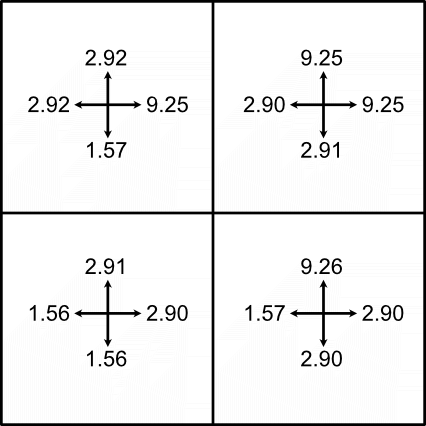:



## Abordagem Clássica

Denotaremos agora a função de variável aleatória **action-value** $Q$ de uma maneira similar ao que fizemos com a função **state-value** $V$ na aula anterior.

* A única diferença que devemos notar é que a primeira ação já está fixa e não segue a política.

* Em outras palavras, a primeira recompensa é definida de forma determinística enquanto que as recompensas seguintes são obtidas de maneira estocástica, devendo seguir a política $\pi$.

* Neste nosso experimento, a política $\pi$ nada mais é do que assumir que todas as ações são equiprováveis.

$$Q_{\pi}(s,a) = \mathbb{E}[G_t | S_t = s, A_t = a]$$

Nesse caso, é possível observar que:

\begin{align}
Q_{\pi}(s, a) & = \mathbb{E}[ R_{t+1} + \gamma G_{t+1} | S_t = s, A_t = a] \\
& = r + \sum_{a'} \gamma V_\pi(s', a'),
\end{align}

onde $s'$ é o estado alcançado após a ação $a$ em $s$ e as ações $a'$ são todas aquelas permitidas no estado $s'$.

Vale notar que o valor de $V_{\pi}(s')$ pode ser obtido como uma média ponderada pela política de todas as ações $a'$ possíveis no estado $s'$.

$$V_{\pi}(s') = \sum_{a'} \pi(a'|s') Q_{\pi}(s',a')$$

Daí surge a seguinte fórmula. Para memorizar esta fórmula, colocaremos ela grande.

$$\huge{Q_{\pi}(s, a) = r + \gamma \sum_{a'} \pi(a'|s')  Q_\pi(s', a')}$$



### Fórmulas do Valor Esperado do Cenário do Robô Jardineiro

Vamos começar com o estado $A$, vamos supor que o dono do robô colocou ele nessa parte do jardim:

\begin{align}
Q_{\pi}(A,A) & = 0 + \gamma \times \left[\frac{1}{2}Q_{\pi}(A,A) + \frac{1}{4}Q_{\pi}(A,B) + \frac{1}{4}Q_{\pi}(A,C)\right]\\
Q_{\pi}(A,B) & = 5 + \gamma \times \left[\frac{1}{4}Q_{\pi}(B,A) + \frac{1}{2}Q_{\pi}(B,B) + \frac{1}{4}Q_{\pi}(B,D)\right]\\
Q_{\pi}(A,C) & = 0 + \gamma \times \left[\frac{1}{4}Q_{\pi}(C,A) + \frac{1}{2}Q_{\pi}(C,C) + \frac{1}{4}Q_{\pi}(C,D)\right]\\
\end{align}

Vamos completar colocando as equações para as outras posições:

Para $B$:

\begin{align}
Q_{\pi}(B,A) & = 0 + \gamma \times \left[\frac{1}{2}Q_{\pi}(A,A) + \frac{1}{4}Q_{\pi}(A,B) + \frac{1}{4}Q_{\pi}(A,C)\right]\\
Q_{\pi}(B,B) & = 5 + \gamma \times \left[\frac{1}{4}Q_{\pi}(B,A) + \frac{1}{2}Q_{\pi}(B,B) + \frac{1}{4}Q_{\pi}(B,D)\right]\\
Q_{\pi}(B,D) & = 0 + \gamma \times \left[\frac{1}{4}Q_{\pi}(D,B) + \frac{1}{4}Q_{\pi}(D,C) + \frac{1}{2}Q_{\pi}(D,D)\right]\\
\end{align}

Para $C$:

\begin{align}
Q_{\pi}(C,A) & = 0 + \gamma \times \left[\frac{1}{2}Q_{\pi}(A,A) + \frac{1}{4}Q_{\pi}(A,B) + \frac{1}{4}Q_{\pi}(A,C)\right]\\
Q_{\pi}(C,C) & = 0 + \gamma \times \left[\frac{1}{4}Q_{\pi}(C,A) + \frac{1}{2}Q_{\pi}(C,C) + \frac{1}{4}Q_{\pi}(C,D)\right]\\
Q_{\pi}(C,D) & = 0 + \gamma \times \left[\frac{1}{4}Q_{\pi}(D,B) +\frac{1}{4} Q_{\pi}(D,C) + \frac{1}{2}Q_{\pi}(D,D)\right]\\
\end{align}


Para $D$:

\begin{align}
Q_{\pi}(D,B) & = 5 + \gamma \times \left[\frac{1}{4}Q_{\pi}(B,A) + \frac{1}{2}Q_{\pi}(B,B) + Q_{\pi}(B,D)\right]\\
Q_{\pi}(D,C) & = 0 + \gamma \times \left[\frac{1}{4}Q_{\pi}(C,A) + \frac{1}{2}Q_{\pi}(C,C) + Q_{\pi}(C,D)\right]\\
Q_{\pi}(D,D) & = 0 + \gamma \times \left[\frac{1}{4}Q_{\pi}(D,B) + Q_{\pi}(D,C) + \frac{1}{2}Q_{\pi}(D,D)\right]\\
\end{align}

O que podemos notar é que temos $12$ equações para 12 variáveis, sendo então um sistema possível de se resolver.



### Computando com Bootstrapping


Nas equações vistas na seção anterior. No lado esquerdo das equações temos as variáveis $Q(S,a)$ que surgiram do valor esperado no tempo $t$ e no lado direito temos as mesmas variáveis no tempo $t+1$. Podemos gerar estimativas para essas variáveis e recomputar os valores para $t$.

Vamos assumir que as nossas estimativas de entrada correspondem a atribuir zero para todos os valores e iterativamente recomputar os valores de $Q$.
Abaixo colocamos a tabela completa para termos uma idéia de quão rápida é a convergência.


**Q(A,A)** | **Q(A,B)** | **Q(A,C)** | **Q(B,A)**|**Q(B,B)** | **Q(B,D)** | **Q(C,A)** | **Q(C,C)**|**Q(C,D)** | **Q(D,A)** | **Q(D,C)** | **Q(D,D)**
---------|----------|----------|--------|---------|----------|----------|---------|--------|----------|----------|--------
0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00
0.00 | 5.00 | 0.00 | 0.00 | 5.00 | 0.00 | 0.00 | 0.00 | 0.00 | 5.00 | 0.00 | 0.00
0.88 | 6.75 | 0.00 | 0.88 | 6.75 | 0.88 | 0.88 | 0.00 | 0.88 | 6.75 | 0.00 | 0.88
1.49 | 7.67 | 0.31 | 1.49 | 7.67 | 1.49 | 1.49 | 0.31 | 1.49 | 7.67 | 0.31 | 1.49
1.92 | 8.20 | 0.63 | 1.92 | 8.20 | 1.92 | 1.92 | 0.63 | 1.92 | 8.20 | 0.63 | 1.92
2.22 | 8.54 | 0.89 | 2.22 | 8.54 | 2.22 | 2.22 | 0.89 | 2.22 | 8.54 | 0.89 | 2.22
2.43 | 8.77 | 1.09 | 2.43 | 8.77 | 2.43 | 2.43 | 1.09 | 2.43 | 8.77 | 1.09 | 2.43
2.57 | 8.92 | 1.23 | 2.57 | 8.92 | 2.57 | 2.57 | 1.23 | 2.57 | 8.92 | 1.23 | 2.57
2.68 | 9.02 | 1.33 | 2.68 | 9.02 | 2.68 | 2.68 | 1.33 | 2.68 | 9.02 | 1.33 | 2.68
2.75 | 9.09 | 1.40 | 2.75 | 9.09 | 2.75 | 2.75 | 1.40 | 2.75 | 9.09 | 1.40 | 2.75
2.80 | 9.15 | 1.45 | 2.80 | 9.15 | 2.80 | 2.80 | 1.45 | 2.80 | 9.15 | 1.45 | 2.80
2.83 | 9.18 | 1.49 | 2.83 | 9.18 | 2.83 | 2.83 | 1.49 | 2.83 | 9.18 | 1.49 | 2.83
2.86 | 9.21 | 1.51 | 2.86 | 9.21 | 2.86 | 2.86 | 1.51 | 2.86 | 9.21 | 1.51 | 2.86
2.88 | 9.22 | 1.53 | 2.88 | 9.22 | 2.88 | 2.88 | 1.53 | 2.88 | 9.22 | 1.53 | 2.88
2.89 | 9.23 | 1.54 | 2.89 | 9.23 | 2.89 | 2.89 | 1.54 | 2.89 | 9.23 | 1.54 | 2.89
2.90 | 9.24 | 1.55 | 2.90 | 9.24 | 2.90 | 2.90 | 1.55 | 2.90 | 9.24 | 1.55 | 2.90
2.90 | 9.25 | 1.56 | 2.90 | 9.25 | 2.90 | 2.90 | 1.56 | 2.90 | 9.25 | 1.56 | 2.90
2.91 | 9.25 | 1.56 | 2.91 | 9.25 | 2.91 | 2.91 | 1.56 | 2.91 | 9.25 | 1.56 | 2.91
2.91 | 9.26 | 1.56 | 2.91 | 9.26 | 2.91 | 2.91 | 1.56 | 2.91 | 9.26 | 1.56 | 2.91
2.91 | 9.26 | 1.57 | 2.91 | 9.26 | 2.91 | 2.91 | 1.57 | 2.91 | 9.26 | 1.57 | 2.91

No código abaixo, mostre como o bootstrapping deve ocorrer. A cada iteração, nos aproximamos dos valores finais tendo como base os valores da iteração anterior. A ideia é que em um tempo finito convergiremos para os valores corretos dos estados.


In [10]:
## Configurações do problema.
recompensa = [0, 5, 0, 0] # A, B, C, D
probabilidades  = [0.25, 0.25, 0.25, 0.25] # up, right down, left (moves probabilities)
gamma   = 0.7

## ToDo: Complete o código do bootstrapping
def bootstrapping(recompensa, probabilidades, gamma) :
    current_values = [0 for i in range(12)] ## Variáveis para guardar os valores esperados a cada iteração

    ## Vamos propor apenas 20 iterações
    for i in range(20):


        next_values    = [None for i in range(12)]

        ## ToDo:
        ## A seguir use os valores atuais em current_values para gerar os valores em
        ## next_values. Você fará isso estado por estado:

        # 0 -  A, A
        next_values[0] = 0

        # 1 - A, B
        next_values[1] = 0

        # 2 - A, C
        next_values[2] = 0


        # 3 -  B, A
        next_values[3] = 0

        # 4 - B, B
        next_values[4] = 0

        # 5 - B, D
        next_values[5] = 0


        # 6 -  C, A
        next_values[6] = 0

        # 7 - C, C
        next_values[7] = 0

        # 8 - C, D
        next_values[8] = 0


        # 9 - D, B
        next_values[9] = 0

        # 10 - D, C
        next_values[10] = 0

        # 11 -  D, D
        next_values[11] = 0



        ## ToDo: melhore esta condição de parada.
        ## para definir que a convergência ocorre
        ## quando as somas das diferenças for igual
        ## a 0.001
        if (current_values == next_values) :
            break

        ## Atualizando os valores para a próxima iteração
        current_values = next_values
    return current_values




print(bootstrapping(recompensa, probabilidades, gamma))

0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00
0.00 | 5.00 | 0.00 | 0.00 | 5.00 | 0.00 | 0.00 | 0.00 | 0.00 | 5.00 | 0.00 | 0.00
0.88 | 6.75 | 0.00 | 0.88 | 6.75 | 0.88 | 0.88 | 0.00 | 0.88 | 6.75 | 0.00 | 0.88
1.49 | 7.67 | 0.31 | 1.49 | 7.67 | 1.49 | 1.49 | 0.31 | 1.49 | 7.67 | 0.31 | 1.49
1.92 | 8.20 | 0.63 | 1.92 | 8.20 | 1.92 | 1.92 | 0.63 | 1.92 | 8.20 | 0.63 | 1.92
2.22 | 8.54 | 0.89 | 2.22 | 8.54 | 2.22 | 2.22 | 0.89 | 2.22 | 8.54 | 0.89 | 2.22
2.43 | 8.77 | 1.09 | 2.43 | 8.77 | 2.43 | 2.43 | 1.09 | 2.43 | 8.77 | 1.09 | 2.43
2.57 | 8.92 | 1.23 | 2.57 | 8.92 | 2.57 | 2.57 | 1.23 | 2.57 | 8.92 | 1.23 | 2.57
2.68 | 9.02 | 1.33 | 2.68 | 9.02 | 2.68 | 2.68 | 1.33 | 2.68 | 9.02 | 1.33 | 2.68
2.75 | 9.09 | 1.40 | 2.75 | 9.09 | 2.75 | 2.75 | 1.40 | 2.75 | 9.09 | 1.40 | 2.75
2.80 | 9.15 | 1.45 | 2.80 | 9.15 | 2.80 | 2.80 | 1.45 | 2.80 | 9.15 | 1.45 | 2.80
2.83 | 9.18 | 1.49 | 2.83 | 9.18 | 2.83 | 2.83 | 1.49 | 2.83 | 9.18 | 1.49 | 2.83
2.86 | 9.21 | 1.